---
layout: default
title: "Deep Learning - RNN - Word embeddings"
categories: deeplearning
permalink: /ML45/
order: 45
comments: true
---

In [1]:
%pylab --no-import-all inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
plt.rcParams["mathtext.fontset"] = "cm"
from matplotlib.patches import Rectangle, Circle
from mpl_flow import Flow
from sklearn.manifold import TSNE

Populating the interactive namespace from numpy and matplotlib


# Word embeddings in NLP
One of the field of machine learning being revolutionized by RNN is Natural Language Processing (NLP), a classically complex task due to the very changeling nature of language and the nuances in its meaning. One the key concepts helping with NLP-related tasks is **word embeddings**, a representation for words that let an algorithm learn analogies (e.g. man is to woman, as king is to queen).

## Word embedding intuition
### Word representation
Up until this point we have been representing words with a vocabulary vector $V$ of a fixed size (let's say 10,000 words) with a word represented by a one-hot vector of size $|V|$

$$
V=\begin{bmatrix}
\small\text{a}\\
\small\text{aaron} \\
\vdots \\
\small\text{zulu}\\
\small\text{<UNK>}
\end{bmatrix}
\qquad
\text{Man}=
\begin{bmatrix}
\small\text{0}\\
\vdots \\
1 \\
\vdots \\
0
\end{bmatrix}
$$

Where we would represent the word `Man` as $O_{5391}$ and the word `Woman` as $O_{9853}$ if these words are at position 5391 and 9853 respectively. This representation has the weakness of treating each word as a separate entity not allowing an algorithm to easily generalize across words. For example suppose we have the two sentences with a blank space:

```
I want a glass of orange ____

I want a glass of apple  ____
```

We can easily see that a word that fits well both blank spaces is `juice`. However, an algorithm that has learned that *I want a glass of **orange** juice* is a likely sentence from the distribution of sentences in our corpus, doesn't necessarily have a similar likelihood for the sentence *I want a glass of **apple** juice*. As far as it knows, the relationship between the words *Apple* and *Orange* is not any closer than the relationship between the words *Apple* and *Man*. In fact the inner product and euclidean distance between any two one-hot vectors is zero since they are all orthogonal.

$$
\begin{split}
& \langle O_x, O_y \rangle = 0 \\
& O_x - O_y = 0
\end{split}
$$

Behind the concept of word embedding, the one-hot representation is replaced by a featurized representation where each word is represented by a set of **learned** features. This new representation is called **embedding**.

|          | Man <br>(5391) | Woman <br>(9853) | King <br>(4914) | Queen <br>(7157)| Apple <br>(456) | Orange<br>(6257) |
|----------|------|-------|-------|-------|-------|--------|
| Gender   | -1   | 1     | -0.95 | 0.97  | 0     | 0.01   |
| Royal    | 0.01 | 0.02  | 0.93  | 0.95  | -0.01 | 0.00   |
| Age      | 0.03 | 0.02  | 0.7   | 0.69  | 0.03  | -0.02  |
| Food     | 0.04 | 0.01  | 0.02  | 0.01  | 0.95  | 0.97   |
| $\vdots$ |      |       |       |       |       |        |

We can now notice that the representation for *Apple* $e_{456}$ and for the word *Orange* $e_{6257}$ are very similar. We expect some of the features to be different but in general their representation should be consistently close. This increases the odds of a learning algorithm to generalize the probability associated to a sentence containing the word *Orange* to the same sentence with the word *Apple*. Learned features are not easily interpretable as the ones used in this example and their exact representation is often hard to figure out.

### Visualizing word embeddings
Once a high-dimensional featurized representation (embedding) is built for each word in a vocabulary, each word will be represented by a high-dimensional vector of feature components. This reflects the reason why they are called embeddings: they are imagined as points *embedded* in a high-dimensional feature-space. It could be useful to visualize the embeddings but it is impossible to represent more than 2-3 dimensions in a plot. To visualize them the high-dimensional space is compressed to a 2D space. The compression method commonly used is the **t-SNE** algorithm ([van der Maaten and Hinton, 2008](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf))

### Relation of word embeddings to face encodings
In face verification and face recognition tasks, input images of faces are represented in vectors called **encodings** (<a href="page:ML40">ML-40</a>). The concept of face encoding and word embedding is very close (not equal) and in the literature the two terms are sometimes used interchangeably.

### Using word embeddings
Let's apply the concept of word embeddings to the named entity recognition example that we have followed throughout <a href="page:ML44">ML-44</a>. Suppose we have the sentences

```
Sally Johnson is an orange farmer

Robert Lin is an apple farmer
```

If the algorithm is trained with the first sentence. Word embeddings will increase the probability of `Robert Lin` being correctly classified as a name. In fact, knowing that `orange` and `apple` are similar will make it easier for the algorithm to correctly classify the rest of the sentence (<a href="#fig:ner">figure below</a>).

Suppose now to replace the words `apple farmer` with the much less common words `durian cultivator`. A small labeled dataset for the named entity training doesn't probably contain the words `durian` and `cultivator`, but if the algorithm has learned a word embedding associating `durian` with fruits and `cultivator` with farmer, it should still be able to generalize well.

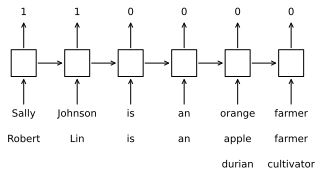

In [2]:
f = Flow(figsize=(5, 3), bbox=dict(boxstyle='square'))

Y = [1,1,0,0,0,0]
sentence_1 = 'Sally Johnson is an orange farmer'
sentence_2 = 'Robert Lin is an apple farmer'
sentence_3 = '    durian cultivator'

for t, (word1, word2, word3, y) in enumerate(zip(sentence_1.split(), sentence_2.split(), sentence_3.split(' '), Y)):
    f.node(f'a{t+1}', label='      \n', startpoint=f'a{t}')
    f.node(f'x{t+1}', label=word1, travel='s', bbox=dict(ec='none'),
           edge_kwargs=dict(arrowprops=dict(arrowstyle='->')), startpoint=f'a{t+1}')
    f.node(f'x2.{t+1}', label=word2, travel='s', bbox=dict(ec='none'), connect=False, startpoint=f'x{t+1}', distance=0.5)
    f.node(f'y{t+1}', label=y, startpoint=f'a{t+1}', travel='n', bbox=dict(ec='none'))
    f.node(f'x3.{t+1}', label=word3, travel='s', bbox=dict(ec='none'), connect=False, startpoint=f'x2.{t+1}', distance=0.5)
        

<i id="fig:ner">An example of a simplified RNN taking variations of a sequence and producing an output.</i>

### Transfer learning of word embeddings
The example in the previous section implies that the word embedding model *knows more* (aka as been trained on a bigger dataset) than the named entity recognition model. In fact, to make full use of word embeddings, they are usually trained on extremely large text corpus, in the range of 1 billion to 100 billion words. On the contrary, a named entity recognition model can be trained on a much smaller dataset, for example 100 thousands words. 

Word embeddings and named entity recognition models don't need to be trained at the same time and are in fact usually trained separately. Pre-trained word embeddings are also freely available with permissive licenses. The knowledge learned by the word embedding model is then **transferred** to the named entity recognition task. 

It is even possible to **finetune** the word embeddings in the task it has ben transferred to, but this is usually done only if such task is trained on a sufficiently big dataset.

### Analogies
Suppose we have a 4-dimensional word embedding as shown in this table and the task and the task of finding an analogy `Man -> Woman as King -> ?`

|          | Man  | Woman | King  | Queen | Apple | Orange |
|----------|------|-------|-------|-------|-------|--------|
| Gender   | -1   | 1     | -0.95 | 0.97  | 0     | 0.01   |
| Royal    | 0.01 | 0.02  | 0.93  | 0.95  | -0.01 | 0.00   |
| Age      | 0.03 | 0.02  | 0.7   | 0.69  | 0.03  | -0.02  |
| Food     | 0.04 | 0.01  | 0.02  | 0.01  | 0.95  | 0.97   |

[Mikolov et al](https://www.aclweb.org/anthology/N13-1090/) first proposed this problem and its solution and this is one of the most surprising and influential results regarding word embeddings that helps the community to better understand word embeddings functioning. They noticed how the difference between the embeddings of `Man` and `Woman` are similar to the difference between the embeddings of `King` and `Queen` 

$$
e_{\text{Man}} - e_{\text{Woman}} = 
\begin{bmatrix} -2 \\ 0 \\ 0 \\ 0 \end{bmatrix} \approx
\begin{bmatrix} -2 \\ 0 \\ 0 \\ 0 \end{bmatrix}
= e_{\text{King}} - e_{\text{Queen}}
$$

The embedding of `Man` differs from the embedding of `Woman` due to a single value (Gender). In a realistic embedding we would have hundreds to thousands of such components, but we can still imagine the embeddings of two words to be different only on one (or few) components. In the high-dimensional feature space of the embedding the difference between the two embeddings is their Euclidean distance. We can imagine the difference of the other set of words in the analogy (`King` and `Queen`) to have a similar (almost parallel) distance vector. In the <a href="#fig:analogy">figure below</a> it is shown an oversimplified representation of this parallelism. Do notice that, should the bi-dimensional feature space used in the plot be produced by the t-SNE algorithm, this parallelism would not be preserved due to the highly non-linear nature of t-SNE.

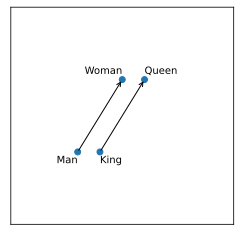

In [26]:
fig, ax = plt.subplots(figsize=(4, 4))
p1 = np.array([0.2, 0.2])
p2 = np.array([0.4, 0.4])
plt.plot(np.hstack([p1, p2]), marker='o', ls='')
plt.annotate('', (0, 0.2), (2, 0.4), arrowprops=dict(arrowstyle='<-'))
plt.annotate('', (1, 0.2), (3, 0.4), arrowprops=dict(arrowstyle='<-'))

plt.text(0, 0.19, 'Man', va='top', ha='right')
plt.text(1, 0.19, 'King', va='top', ha='left')
plt.text(2, 0.41, 'Woman', va='bottom', ha='right')
plt.text(3, 0.41, 'Queen', va='bottom', ha='left')

plt.gca().set_xlim(-3, 7)
plt.gca().set_ylim(0, .6)
ax.set_xticks([])
ax.set_yticks([]);

<i id="fig:analogy">A simplified representation of how an analogous relationship between words would look in the highly dimensional feature space of the embeddings. The arrows represent the distance between two similar words. Arrows between analogous concepts would be parallel(ish)</i>

To correctly identify the right word to complete the analogy an algorithm would need to set a value of $e_?$ that satisfies the condition

$$
e_{\text{Man}} - e_{\text{Woman}} \approx e_{\text{King}} - e_{\text{?}}
$$

The algorithm needs to find the word $w$ so that it maximizes the similarity $\text{sim}$ between the two differences

$$
\arg\max_w \; \text{sim}(e_w, e_\text{King} - e_\text{Man} + e_\text{Woman})
$$

The similarity function $\text{sim}$ most commonly used is the **cosine similarity**, defined as:

$$
\text{sim}(u,v) = \frac{u^Tv}{\| u \|_2 \| v \|_2}
$$

where the numerator is basically the inner product between $u$ and $v$ ($u^Tv = \langle u, v \rangle$). If $u$ and $v$ are very similar (parallel) the inner product will tend to be large; if they are very different (orthogonal) the inner product will tend to 0. This similarity function is called cosine similarity because it computes the cosine between the vectors $u$ and $v$ (<a href="#fig:cosine">figure below</a>): 

* $\cos = 1$ when the angle $\phi=0$ (parallel, same direction)
* $\cos = 0$ when the angle $\phi=90^{\circ}$ (orthogonal)
* $\cos = -1$ when the angle $\phi=180^{\circ}$ (parallel, opposite direction)

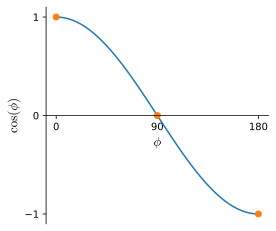

In [27]:
x = np.linspace(0, np.pi)
y = np.cos(x)

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(np.degrees(x), y)

x2 = np.linspace(0, np.pi, 3)
y2 = np.cos(x2)
ax.plot(np.degrees(x2), y2, ls='', marker='o')
ax.set_xticks(np.degrees(x2))
ax.set_yticks(y2)
ax.set_xlabel('$\\phi$', fontsize=13)
ax.set_ylabel('$\\cos(\\phi)$', fontsize=13)
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')

<i id="fig:cosine">Cosine function for values of the angle $\phi$ between to vectors in the range $[0, \pi]$</i>

## Learning Word embeddings
### Embedding matrix
The task 